# Unsupervised Learning am Beispiel des K-Means Clustering

Wenn man JPG-Bilder, zum Beispiel Satellitenbilder, mit K-Means Clustering analysierst, ist das Ziel oft, visuell ähnliche Bereiche im Bild zu identifizieren und zu gruppieren. Das kann helfen, verschiedene Landbedeckungen oder Umweltmerkmale wie Wasser, Vegetation, bebauten Bereichen oder Wüstenlandschaften zu unterscheiden. Nach der Clusteranalyse kann man die Ergebnisse nutzen, um die Verteilung und Ausdehnung bestimmter Merkmale zu untersuchen, Veränderungen im Laufe der Zeit zu analysieren oder spezifische Bereiche für detailliertere Studien auszuwählen.

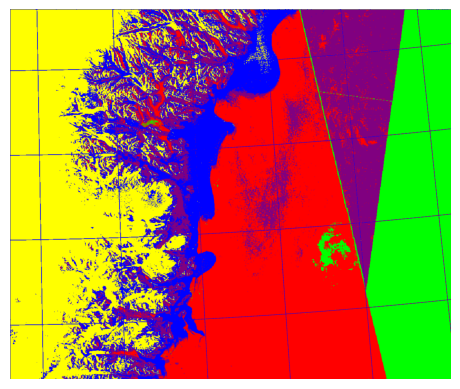

In [1]:
#import necessary libraries
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
image = Image.open('Greenland/20170313_cut.jpg')
# Convert image to a NumPy array
image_np = np.array(image)

# Prepare image for clustering (flatten it)
image_reshaped = image_np.reshape(-1, 3)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(image_reshaped)

# Retrieve the labels for each pixel
labels = kmeans.labels_

# Replace each pixel with the RGB value of the cluster's centroid
clustered_img = kmeans.cluster_centers_[labels].reshape(image_np.shape)

# Define colors for the clusters: Red, Blue, Green for 3 clusters + Yellow and Purple for 5 clusters
cluster_colors = [(255, 0, 0), (0, 0, 255), (0, 255, 0), (255, 255, 0), (128, 0, 128)]
clustered_img_colored = np.array([cluster_colors[label] for label in labels])

# Convert to a NumPy array and reshape
clustered_img_colored = clustered_img_colored.reshape(image_np.shape)

# Display the clustered image with assigned colors
plt.imshow(clustered_img_colored.astype('uint8'))
plt.axis('off')
plt.show()



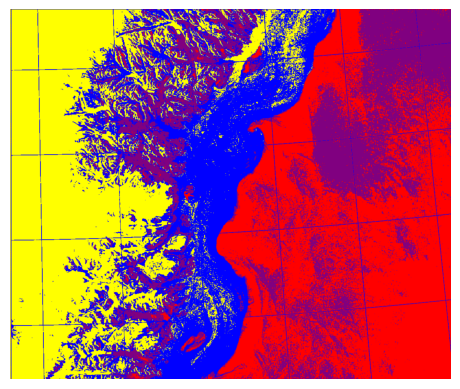

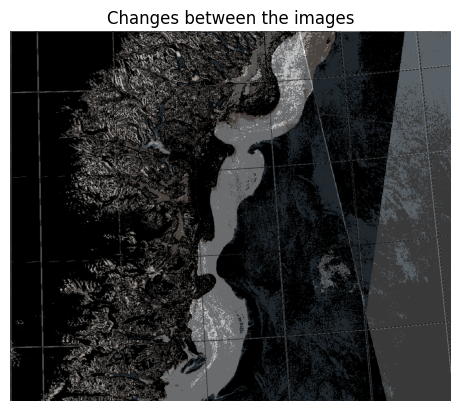

In [2]:
# Load the image
new_image = Image.open('Greenland/20240313_cut.jpg')
# Scale the new image to the size of the first image
new_image_resized = new_image.resize(image.size, Image.Resampling.LANCZOS)

new_image_np = np.array(new_image)
new_image_reshaped = new_image_np.reshape(-1, 3)

# Use the previously trained model to predict the clusters for the new image
new_labels = kmeans.predict(new_image_reshaped)

# Create the clustered image for the new image
new_clustered_img = kmeans.cluster_centers_[new_labels].reshape(new_image_np.shape)

# Compare the clustered images to visualize the differences
difference = np.abs(new_clustered_img.astype(int) - clustered_img.astype(int))

# Display the clustered image with assigned colors
# Assign colors to the new labels
new_clustered_img_colored = np.array([cluster_colors[label] for label in new_labels])

# Reshape to fit the new image
new_clustered_img_colored = new_clustered_img_colored.reshape(new_image_np.shape)

# Display the new image with the assigned colors
plt.imshow(new_clustered_img_colored.astype('uint8'))
plt.axis('off')
plt.show()

# Visualize the difference
plt.imshow(difference)
plt.title('Changes between the images')
plt.axis('off')
plt.show()
